In [1]:
# !pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip

In [2]:
import numpy as np
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,LeaveOneOut,KFold
from imblearn.over_sampling import SMOTE
from skrvm import RVC
import matplotlib.pyplot as plt
import extract_vector as ev

In [3]:
arousal_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
arousal_label = ev.getLabelData(type="arousal")

valence_dataset = pickle.load(open("../Dataset/FusedData/FusedAllData.pkl","rb"))
valence_label = ev.getLabelData(type="valence")

In [4]:
arousal_dataset = arousal_dataset.astype(float)
arousal_label = arousal_label.astype(float)

valence_dataset = valence_dataset.astype(float)
valence_label = valence_label.astype(float)

In [5]:
def getLabel(label):
    new_label=[]
    for i in range(len(label)):
        if(label[i][0]>=4.5):
            new_label.append(1)
        else:
            new_label.append(0)
    return new_label

In [6]:
# clean data
def clean_data(dataset, target):
    del_rows = []
    for i in range(len(dataset)):
        if(np.isnan(dataset[i]).sum() > 0):
            del_rows.append(i)
            
    dataset = np.delete(dataset, del_rows, axis=0)
    target = np.delete(target, del_rows, axis=0)
    
    return dataset,target

In [7]:
arousal_dataset,arousal_label = clean_data(arousal_dataset,arousal_label)
valence_dataset,valence_label = clean_data(valence_dataset,valence_label)

In [8]:
arousal_label = getLabel(arousal_label)
valence_label = getLabel(valence_label)

In [9]:
print(arousal_dataset.shape)

(755, 126)


In [10]:
sm1 = SMOTE()
arousal_dataset,arousal_label = sm1.fit_resample(arousal_dataset,arousal_label)

sm2 = SMOTE()
valence_dataset,valence_label = sm2.fit_resample(valence_dataset,valence_label)

In [11]:
sc = StandardScaler()

arousal_dataset = sc.fit_transform(arousal_dataset)
valence_dataset = sc.fit_transform(valence_dataset)

In [12]:
pca = PCA(n_components=0.95)

arousal_dataset = pca.fit_transform(arousal_dataset)
valence_dataset = pca.fit_transform(valence_dataset)

In [13]:
ar_model = RVC()
val_model = RVC()

In [14]:
x_a_train,x_a_test,y_a_train,y_a_test = train_test_split(arousal_dataset,arousal_label,test_size=0.2,random_state=42)
x_v_train,x_v_test,y_v_train,y_v_test = train_test_split(valence_dataset,valence_label,test_size=0.2,random_state=42)

# Arousal

In [15]:
ar_model.fit(x_a_train,np.array(y_a_train))

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [16]:
pred_a = ar_model.predict(x_a_train)
print(classification_report(y_a_train,pred_a))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       418
           1       0.98      0.96      0.97       410

    accuracy                           0.97       828
   macro avg       0.97      0.97      0.97       828
weighted avg       0.97      0.97      0.97       828



In [17]:
pred_a = ar_model.predict(x_a_test)
print(classification_report(y_a_test,pred_a))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.79      0.86      0.82       108

    accuracy                           0.81       208
   macro avg       0.81      0.81      0.81       208
weighted avg       0.81      0.81      0.81       208



In [18]:
confusion_matrix(y_a_test,pred_a)

array([[75, 25],
       [15, 93]], dtype=int64)

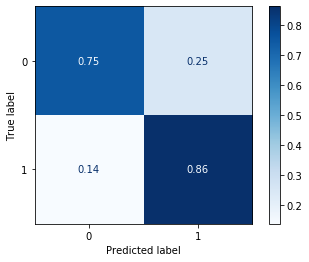

In [19]:
plot_confusion_matrix(ar_model,x_a_test,y_a_test,normalize='true',cmap=plt.cm.Blues)

In [20]:
print(accuracy_score(pred_a,y_a_test))

0.8076923076923077


### K Fold Cross Validation:-

In [21]:
# cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
# cross_val_score(ar_model,arousal_dataset,np.array(arousal_label),scoring='accuracy',cv=cvkfold).mean()*100

### Leave One Out Cross Validation:-

In [22]:
# loo = LeaveOneOut()
# no_splits=loo.get_n_splits(arousal_dataset)
# no_splits

In [23]:
# cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
# cross_val_score(ar_model,arousal_dataset,np.array(arousal_label),scoring='accuracy',cv=cvloocv).mean()*100

# Valence 

In [24]:
val_model.fit(x_v_train,np.array(y_v_train))

RVC(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
    coef1=None, degree=3, kernel='rbf', n_iter=3000,
    threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [25]:
pred_v = val_model.predict(x_v_train)
print(classification_report(y_v_train,pred_v))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       344
           1       0.91      0.88      0.90       379

    accuracy                           0.89       723
   macro avg       0.89      0.89      0.89       723
weighted avg       0.89      0.89      0.89       723



In [26]:
pred_v = val_model.predict(x_v_test)
print(classification_report(y_v_test,pred_v))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61       108
           1       0.50      0.68      0.57        73

    accuracy                           0.59       181
   macro avg       0.60      0.61      0.59       181
weighted avg       0.62      0.59      0.59       181



In [27]:
confusion_matrix(y_v_test,pred_v)

array([[57, 51],
       [23, 50]], dtype=int64)

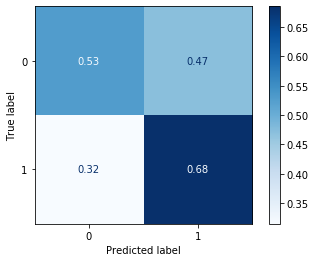

In [28]:
plot_confusion_matrix(val_model,x_v_test,y_v_test,normalize='true',cmap=plt.cm.Blues)

In [29]:
print(accuracy_score(pred_v,y_v_test))

0.5911602209944752


### K Fold Cross Validation:-

In [30]:
# cvkfold = ShuffleSplit(n_splits=5,test_size=0.3,random_state=42)
# cross_val_score(val_model,valence_dataset,valence_label,scoring='accuracy',cv=cvkfold).mean()*100

###  Leave One Out Cross Validation:-

In [31]:
# loo = LeaveOneOut()
# no_splits=loo.get_n_splits(valence_dataset)
# no_splits

In [32]:
# cvloocv=ShuffleSplit(n_splits=no_splits,test_size=0.3,random_state=42)
# cross_val_score(val_model,valence_dataset,valence_label,scoring='accuracy',cv=cvloocv).mean()*100